# Script to Create Supplemental Figure - Area Under the Cruve by EBUS and Subregion

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import math
import glob
import warnings 
warnings.simplefilter('ignore') 

### Read in Area Under the Cruve Data

In [3]:
#read in data
df = pd.read_csv('../data/upwellingfootprint_annualsummary_nearshore_Modified-Subregions.csv')

#split the region into two columns
df[['EBUS', 'Region']] = df['Random_name'].str.split('-', 1, expand=True)

#replace the / with a - in Iberian/Canary
df['EBUS'] = df['EBUS'].str.replace('/','-')
df

,Random_name,Year,Percent,Points,EBUS,Region
0,California-Central,2003,27.561667,54268.250000,California,Central
1,California-Central,2004,32.412500,63819.500000,California,Central
2,California-Central,2005,30.626667,60302.250000,California,Central
3,California-Central,2006,31.494167,62010.416667,California,Central
4,California-Central,2007,45.545000,89676.083333,California,Central
...,...,...,...,...,...,...
229,Humboldt-Poleward,2018,35.733333,165165.500000,Humboldt,Poleward
230,Humboldt-Poleward,2019,42.515000,196516.083333,Humboldt,Poleward
231,Humboldt-Poleward,2020,37.940833,175369.333333,Humboldt,Poleward
232,Humboldt-Poleward,2021,38.030833,175785.416667,Humboldt,Poleward


### Create Figure

##### Figure with SST, Wind, and Percent (Vertical)

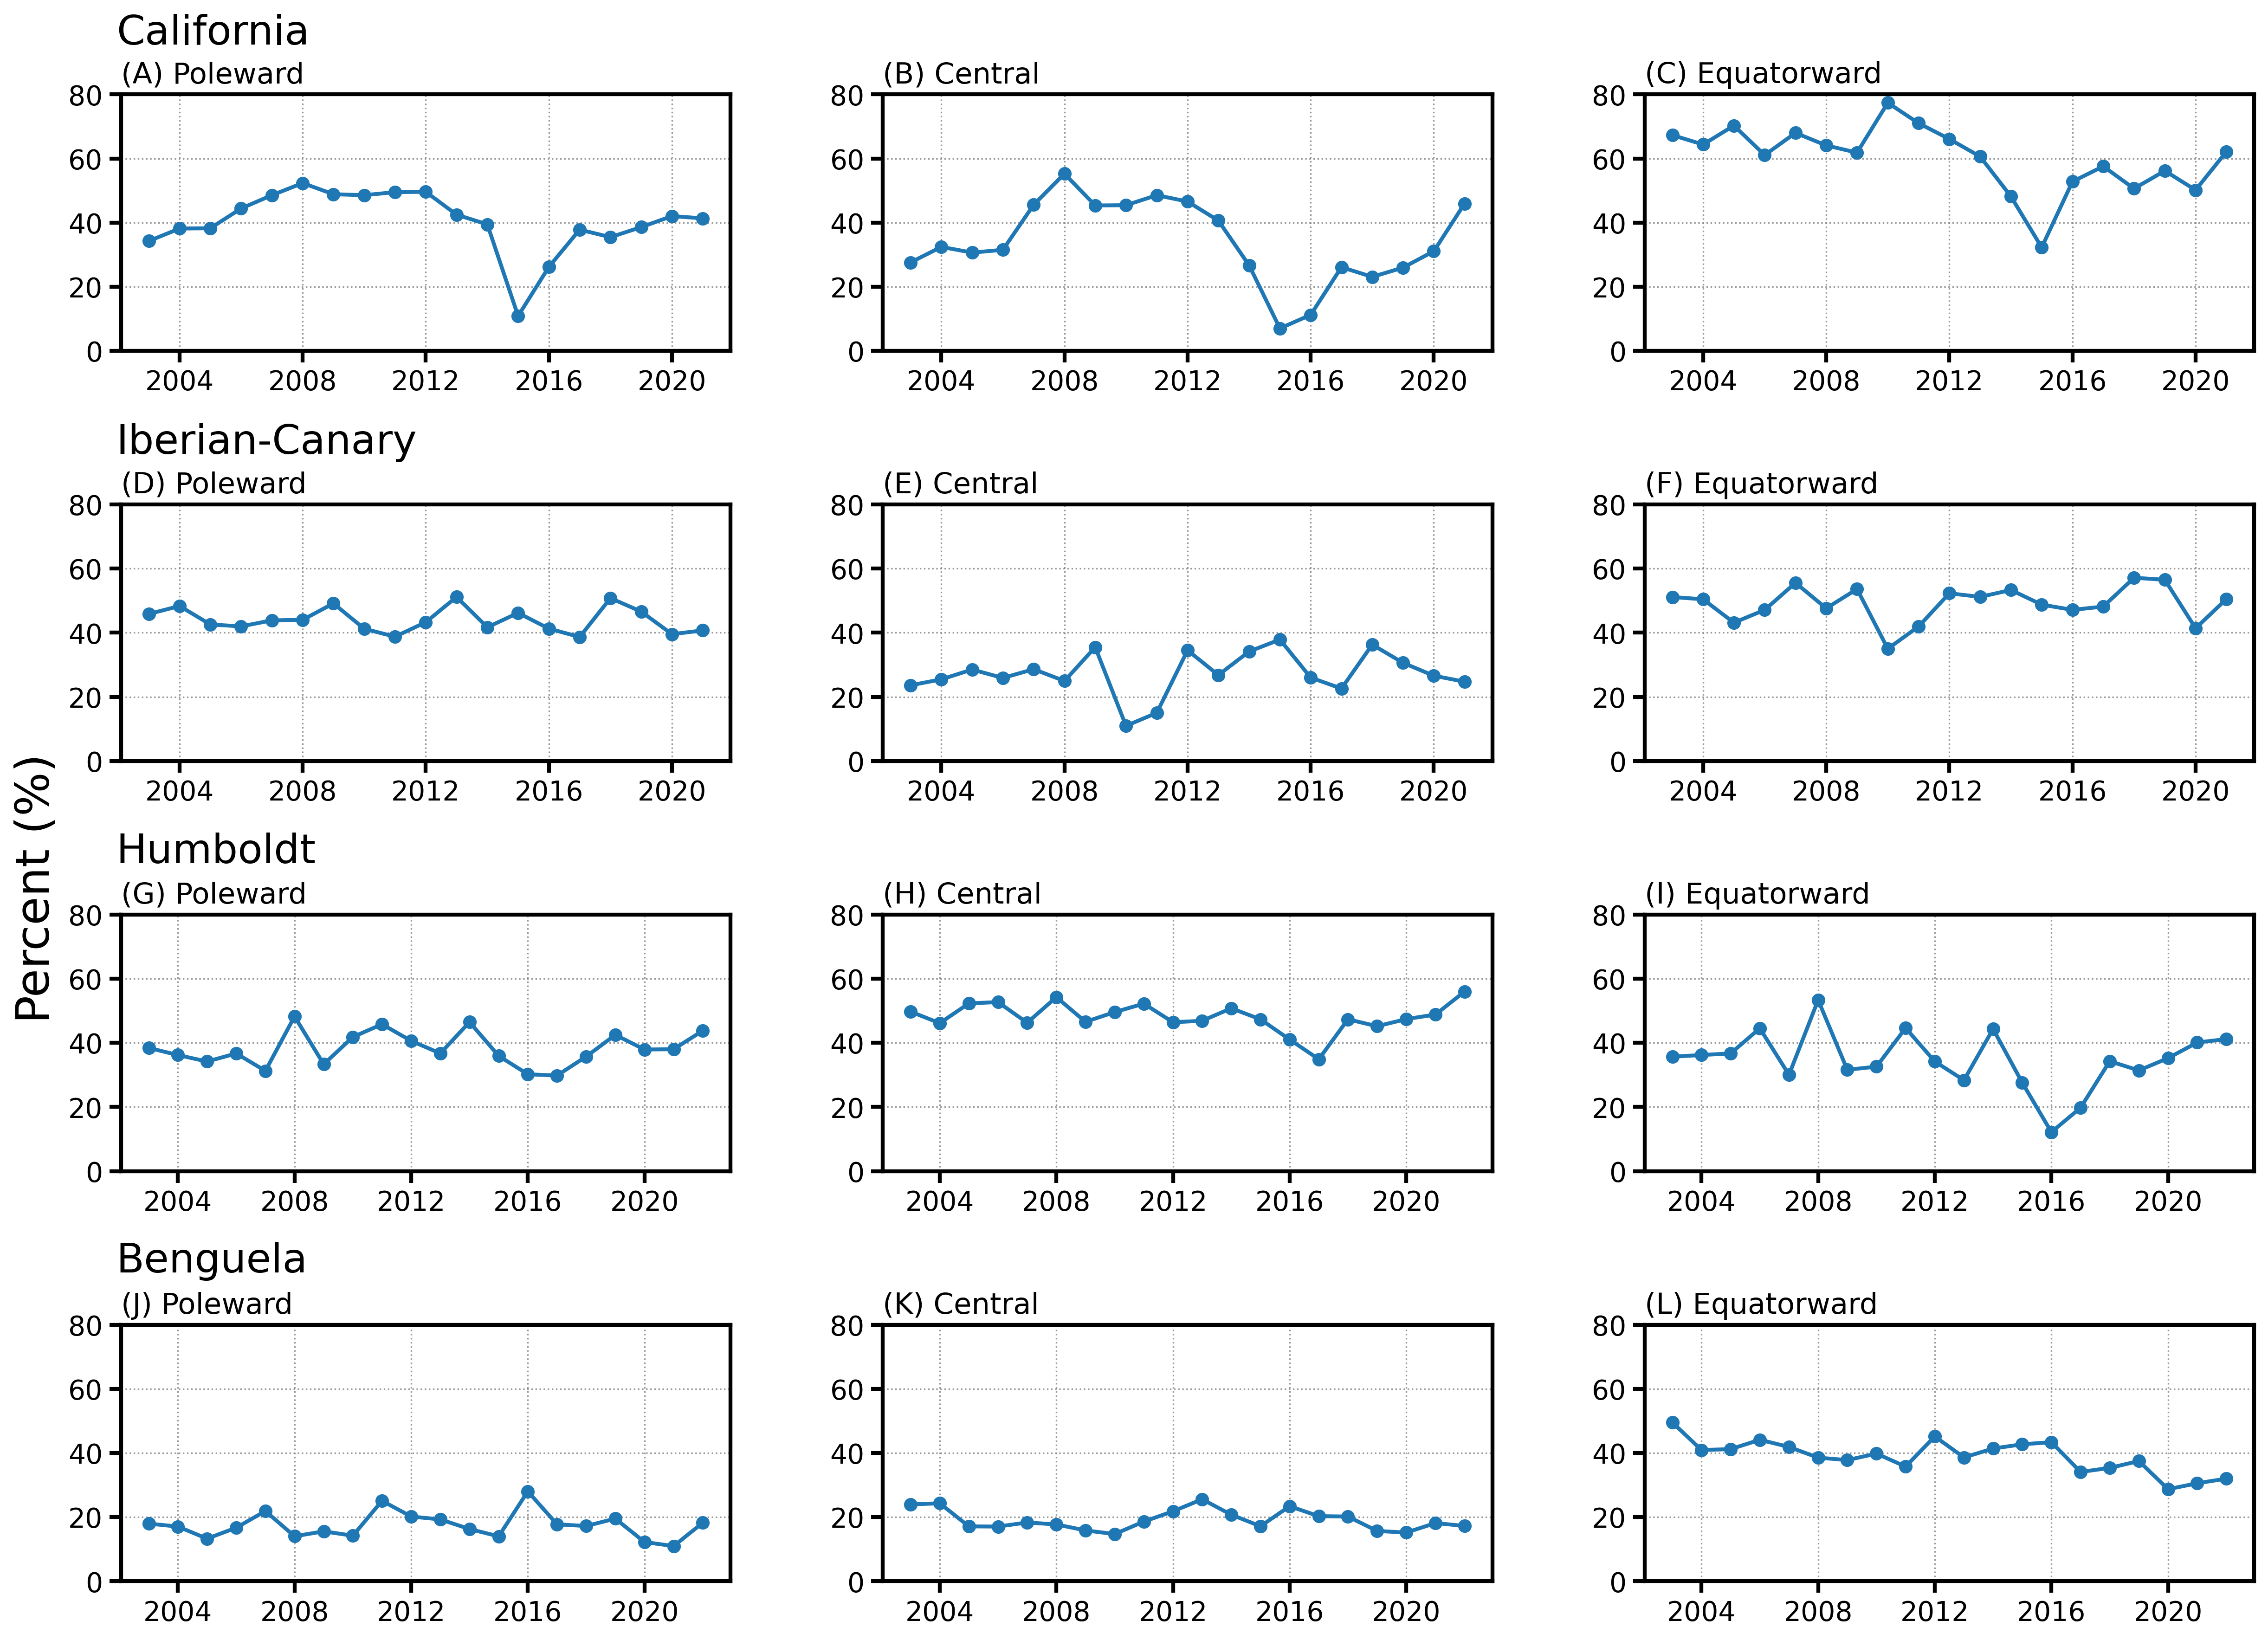

In [4]:
#create a 3x4 figure 
fig, axs = plt.subplots(4, 3, figsize=(16, 12), dpi = 300)

figure_label_list = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'], ['J', 'K', 'L']]

#loop through all of the columns/ebus
for i, figure_label_item, ebus in zip([*range(4)], range(4), ['California', 'Iberian-Canary', 'Humboldt', 'Benguela']):
    
    #loop through all of the rows/regions
    for j, figure_label, region in zip([*range(3)], figure_label_list[figure_label_item], ['Poleward', 'Central', 'Equatorward']):
        
        #filter the data
        temp = df[(df['EBUS'] == ebus) & (df['Region'] == region)]
        
        #plot the data but don't add the label
        axs[i, j].plot(temp['Year'], temp['Percent'], marker = 'o', linewidth = 2)
            
        #customize the x ticks to only show four months and label them as months
        axs[i, j].set_xticks([*range(2004, 2022, 4)])
        
        #add a grid to the data
        #axs[i, j].grid(True, alpha=0.5, zorder=0)
        
        #remove the axis titles for individual plots
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        
        #add a title that represents the region for each plot
        axs[i, j].set_title('(' + figure_label + ') ' + region, fontsize = 15, loc='left')

        #calculate the ticks so that they're even for the two axes
        axs[i, j].set_yticks([*range(0, 91, 20)])

        #set tick labels
        axs[i, j].tick_params('both', labelsize=14, width = 2, length = 6)
        #increase line width of plot border
        [x.set_linewidth(2) for x in axs[i, j].spines.values()]
        axs[i, j].grid(c = 'grey', alpha = 0.8, zorder = 0, linestyle = 'dotted')


#adjust the figure
fig.tight_layout() 
fig.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.6, wspace=0.25)

#add text elements for the axis labels
fig.text(-0.015, 0.35, 'Percent (%)', fontsize = 24, rotation = 90)

#add text elements for the ebus 
fig.text(0.031, 0.93, 'California', fontsize = 21, ha='left')
fig.text(0.031, 0.685, 'Iberian-Canary', fontsize = 21, ha='left')
fig.text(0.031, 0.44, 'Humboldt', fontsize = 21, ha='left')
fig.text(0.031, 0.195, 'Benguela', fontsize = 21, ha='left')

# #shift the right Benguela plot closer towards center to minimize the white space
# box = axs[3, 2].get_position()
# box.x0 = box.x0 - 0.332
# box.x1 = box.x1 - 0.332
# axs[3, 2].set_position(box)

#fig.suptitle('Testing', fontsize = 24)
plt.savefig('./figures/Supplemental_AUC_EBUS_Subregion.jpg', facecolor='white', bbox_inches = 'tight', dpi = 300)
